**Standarisasi Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_excel("/content/Data PDAM.xlsx")

# Ganti sesuai hasil pengecekan
kolom = [
    'goltarif',
    'wilayah',
    'lama berlangganan',
    'mawal',
    'makhir',
    'pemakaian',
    'minpemakaianair',
    'slip tagihan',
    'jumlah tagihan (Rp.)'
]

scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df[kolom]), columns=kolom)
df_final = pd.concat([df.drop(columns=kolom), df_std], axis=1)

df_final.to_excel("Data_Standarisasi.xlsx", index=False)


In [ ]:
df_final.to_excel("Data_Standarisasi.xlsx", index=False)

In [ ]:
from google.colab import files
files.download("Data_Standarisasi.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Melakukan PCA**

In [ ]:
# ===========================================
# PCA Lengkap Sampai PCA9 (untuk seluruh data)
# ===========================================

import pandas as pd
import numpy as np
from openpyxl import Workbook

# 1. Baca file standar
df = pd.read_excel("/content/Data Standarisasi PDAM.xlsx")

# 2. Ambil kolom yang diawali 'z_'
kolom_pca = [c for c in df.columns if c.startswith('z_')]
X = df[kolom_pca].values
var_names = kolom_pca

# 3. Hitung matriks korelasi (karena data sudah distandarisasi)
R = np.corrcoef(X, rowvar=False)

# 4. Hitung eigenvalue dan eigenvector
eigenvalues, eigenvectors = np.linalg.eig(R)

# 5. Urutkan dari yang terbesar
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# 6. Hitung proporsi dan kumulatif variansi
total = np.sum(eigenvalues)
proporsi = (eigenvalues / total) * 100
kumulatif = np.cumsum(proporsi)

# 7. Buat dataframe informasi eigenvalue
eigen_info = pd.DataFrame({
    "Komponen": [f"PCA{i+1}" for i in range(len(eigenvalues))],
    "Eigenvalue": np.round(eigenvalues, 4),
    "Proporsi_Variansi(%)": np.round(proporsi, 2),
    "Kumulatif(%)": np.round(kumulatif, 2)
})

# 8. Hitung skor PCA (projection)
scores = np.dot(X, eigenvectors)
pca_scores = pd.DataFrame(scores, columns=[f"PCA{i+1}" for i in range(scores.shape[1])])

# 9. Loading Matrix
loading_matrix = pd.DataFrame(
    eigenvectors,
    columns=[f"PCA{i+1}" for i in range(len(eigenvalues))],
    index=var_names
)

# 10. Simpan ke Excel
with pd.ExcelWriter("Hasil_PCA_9Komponen.xlsx", engine="openpyxl") as writer:
    pca_scores.to_excel(writer, sheet_name="PCA_Scores", index=False)
    eigen_info.to_excel(writer, sheet_name="Eigen_Info", index=False)
    loading_matrix.to_excel(writer, sheet_name="Loading_Matrix")

print("PCA selesai. File tersimpan sebagai: Hasil_PCA.xlsx")
print("Sheet yang dihasilkan:")
print("• PCA_Scores -> skor tiap PCA untuk seluruh data")
print("• Eigen_Info -> nilai eigenvalue, proporsi, kumulatif")
print("• Loading_Matrix -> kontribusi tiap variabel ke PCA")


PCA selesai. File tersimpan sebagai: Hasil_PCA.xlsx
Sheet yang dihasilkan:
• PCA_Scores -> skor tiap PCA untuk seluruh data
• Eigen_Info -> nilai eigenvalue, proporsi, kumulatif
• Loading_Matrix -> kontribusi tiap variabel ke PCA


In [ ]:
# ===========================================
# PCA Lengkap Sampai PCA9 (dengan kovarians)
# ===========================================

import pandas as pd
import numpy as np
from openpyxl import Workbook

# 1. Baca file data hasil standarisasi
df = pd.read_excel("/content/Data Standarisasi PDAM.xlsx")

# 2. Ambil kolom yang diawali 'z_' (variabel hasil standarisasi)
kolom_pca = [c for c in df.columns if c.startswith('z_')]
X = df[kolom_pca].values
var_names = kolom_pca

# 3. Hitung matriks korelasi (karena data sudah distandarisasi)
R = np.corrcoef(X, rowvar=False)

# 4. Hitung matriks kovarians (opsional, untuk perbandingan)
#    Karena data sudah distandarisasi, hasilnya akan mirip dengan korelasi,
#    tapi tetap dihitung agar lengkap secara teoritis.
C = np.cov(X, rowvar=False)

# 5. Hitung eigenvalue dan eigenvector dari matriks korelasi
eigenvalues, eigenvectors = np.linalg.eig(R)

# 6. Urutkan dari yang terbesar
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# 7. Hitung proporsi dan kumulatif variansi
total = np.sum(eigenvalues)
proporsi = (eigenvalues / total) * 100
kumulatif = np.cumsum(proporsi)

# 8. Buat dataframe informasi eigenvalue
eigen_info = pd.DataFrame({
    "Komponen": [f"PCA{i+1}" for i in range(len(eigenvalues))],
    "Eigenvalue": np.round(eigenvalues, 4),
    "Proporsi_Variansi(%)": np.round(proporsi, 2),
    "Kumulatif(%)": np.round(kumulatif, 2)
})

# 9. Hitung skor PCA (projection ke sumbu baru)
scores = np.dot(X, eigenvectors)
pca_scores = pd.DataFrame(scores, columns=[f"PCA{i+1}" for i in range(scores.shape[1])])

# 10. Matriks loading (kontribusi variabel terhadap komponen)
loading_matrix = pd.DataFrame(
    eigenvectors,
    columns=[f"PCA{i+1}" for i in range(len(eigenvalues))],
    index=var_names
)

# 11. Simpan hasil ke Excel (3 sheet utama + 1 tambahan untuk kovarians & korelasi)
with pd.ExcelWriter("Hasil_PCA_9Komponen.xlsx", engine="openpyxl") as writer:
    pca_scores.to_excel(writer, sheet_name="PCA_Scores", index=False)
    eigen_info.to_excel(writer, sheet_name="Eigen_Info", index=False)
    loading_matrix.to_excel(writer, sheet_name="Loading_Matrix")
    pd.DataFrame(R, index=var_names, columns=var_names).to_excel(writer, sheet_name="Matriks_Korelasi")
    pd.DataFrame(C, index=var_names, columns=var_names).to_excel(writer, sheet_name="Matriks_Kovarians")

print("✅ PCA selesai. File tersimpan sebagai: Hasil_PCA_9Komponen.xlsx")
print("Sheet yang dihasilkan:")
print("• PCA_Scores → Skor tiap PCA untuk seluruh data")
print("• Eigen_Info → Nilai eigenvalue, proporsi, dan kumulatif variansi")
print("• Loading_Matrix → Kontribusi tiap variabel terhadap PCA")
print("• Matriks_Korelasi → Korelasi antar variabel")
print("• Matriks_Kovarians → Kovarians antar variabel")


✅ PCA selesai. File tersimpan sebagai: Hasil_PCA_9Komponen.xlsx
Sheet yang dihasilkan:
• PCA_Scores → Skor tiap PCA untuk seluruh data
• Eigen_Info → Nilai eigenvalue, proporsi, dan kumulatif variansi
• Loading_Matrix → Kontribusi tiap variabel terhadap PCA
• Matriks_Korelasi → Korelasi antar variabel
• Matriks_Kovarians → Kovarians antar variabel


In [ ]:
eigen_info

,Komponen,Eigenvalue,Proporsi_Variansi(%),Kumulatif(%)
0,PCA1,2.9592,32.88,32.88
1,PCA2,1.8222,20.25,53.13
2,PCA3,1.3452,14.95,68.07
3,PCA4,1.1261,12.51,80.59
4,PCA5,0.7421,8.25,88.83
5,PCA6,0.5884,6.54,95.37
6,PCA7,0.2762,3.07,98.44
7,PCA8,0.1406,1.56,100.00
8,PCA9,0.0000,0.00,100.00


Berdasarkan hasil analisis Principal Component Analysis (PCA), diperoleh nilai eigenvalue dan proporsi variansi untuk sembilan komponen utama. Empat komponen pertama (PCA1–PCA4) mampu menjelaskan sebesar 80,59% dari total variasi data

# **Input Data**

In [ ]:
import pandas as pd

# Baca file hasil PCA
df_pca = pd.read_excel("/content/PCA.xlsx")

# Ambil 4 komponen utama
X_pca = df_pca[["PCA1", "PCA2", "PCA3", "PCA4"]]

df_pca.head()


,PCA1,PCA2,PCA3,PCA4
0,-1.165904,-0.786032,-1.299190,1.743680
1,-0.934429,-1.212231,0.297898,2.197235
2,-1.106282,-0.583548,-0.730386,1.715428
3,-0.959398,-0.452741,-1.151966,1.581957
4,-0.538690,-0.598799,-1.097129,0.433926


**Sillhouette**

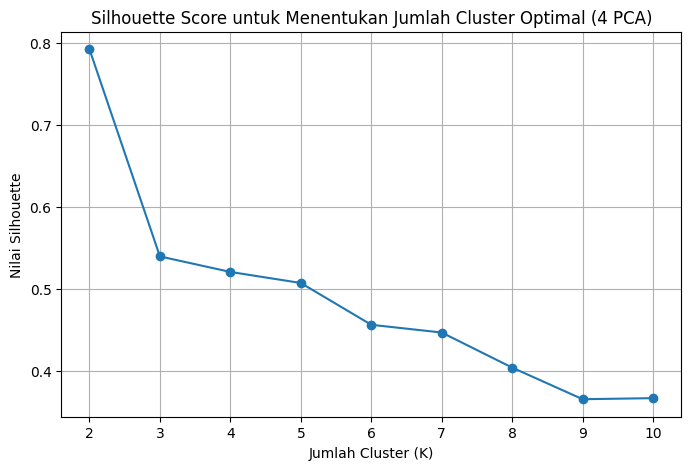

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_n_clusters = range(2, 11)
silhouette_scores = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

# Plot hasilnya
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Silhouette Score untuk Menentukan Jumlah Cluster Optimal (4 PCA)")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Nilai Silhouette")
plt.grid(True)
plt.show()


In [ ]:
for k, score in zip(range_n_clusters, silhouette_scores):
    print(f"K = {k}, Silhouette Score = {score:.4f}")

K = 2, Silhouette Score = 0.7927
K = 3, Silhouette Score = 0.5395
K = 4, Silhouette Score = 0.5205
K = 5, Silhouette Score = 0.5070
K = 6, Silhouette Score = 0.4559
K = 7, Silhouette Score = 0.4465
K = 8, Silhouette Score = 0.4036
K = 9, Silhouette Score = 0.3650
K = 10, Silhouette Score = 0.3663


In [ ]:
k_optimal = 3  # ganti sesuai hasil tertinggi silhouette

kmeans_final = KMeans(n_clusters=k_optimal, random_state=42)
df_pca["Cluster"] = kmeans_final.fit_predict(X_pca)

# Simpan hasil ke file Excel
df_pca.to_excel("Hasil_Clustering_PCA4_K3.xlsx", index=False)
print("Clustering selesai. File tersimpan sebagai Hasil_Clustering_PCA4_K3.xlsx")


Clustering selesai. File tersimpan sebagai Hasil_Clustering_PCA4_K3.xlsx


**K-Means Clustering**

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# 1. Baca data PCA (pastikan file dan sheet sesuai)
df_pca = pd.read_excel("/content/PCA.xlsx")

# 2. Pilih kolom PCA1–PCA4
X = df_pca[['PCA1', 'PCA2', 'PCA3', 'PCA4']]

# 3. Tentukan centroid awal dari baris Excel ke-307, 142, dan 235 (→ 306, 141, 234 di Python)
centroids_awal = X.iloc[[306, 141, 234]]

# 4. Jalankan K-Means dengan centroid awal
kmeans = KMeans(
    n_clusters=3,
    init=centroids_awal.values,  # centroid awal dari data
    n_init=1,
    max_iter=300,
    random_state=42
)
kmeans.fit(X)

# 5. Tambahkan hasil cluster ke dataframe
df_pca['Cluster'] = kmeans.labels_

# 6. Hitung centroid akhir
centroid_akhir = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=X.columns
)

# 7. Hitung jumlah anggota tiap cluster
jumlah_anggota = df_pca['Cluster'].value_counts().sort_index()

# 8. Tampilkan hasil
print("=== Centroid Akhir ===")
print(centroid_akhir)
print("\n=== Jumlah Anggota per Cluster ===")
for i, jml in enumerate(jumlah_anggota):
    print(f"Cluster {i}: {jml} anggota")

# 9. Simpan ke Excel
with pd.ExcelWriter("Hasil_KMeans_PCA4_awalmanual.xlsx", engine="openpyxl") as writer:
    df_pca.to_excel(writer, sheet_name="Data+Cluster", index=False)
    centroid_akhir.to_excel(writer, sheet_name="Centroid_Akhir", index=False)
    jumlah_anggota.to_excel(writer, sheet_name="Jumlah_Anggota")

print("\nFile disimpan sebagai: Hasil_KMeans_PCA4_awalmanual.xlsx")

=== Centroid Akhir ===
       PCA1      PCA2      PCA3      PCA4
0  1.783745  1.870745  0.509769  0.523132
1 -0.302269 -0.271053  0.090953 -0.936876
2 -0.640175 -0.721160 -0.378256  0.743020

=== Jumlah Anggota per Cluster ===
Cluster 0: 67 anggota
Cluster 1: 135 anggota
Cluster 2: 123 anggota

File disimpan sebagai: Hasil_KMeans_PCA4_awalmanual.xlsx


Cluster 0 memiliki 67 anngota

Cluster 1 memiliki 135 anggota

Cluster 2 memiliki 123 anggota

**Random Forest dan Evaluasi Data Training**

In [ ]:
import pandas as pd

# baca file Excel yang udah diacak & isinya cuma 260 data
df = pd.read_excel("/content/Data Training.xlsx")

print("Jumlah data terbaca:", len(df))
df.head()

Jumlah data terbaca: 260


,PCA1,PCA2,PCA3,PCA4,Cluster Aktual
0,-0.965519,-0.772867,-1.217171,1.431805,C3
1,-0.066529,-0.518432,-0.725317,-0.525408,C2
2,-0.549137,-0.030444,-0.302587,-0.479247,C2
3,-0.033192,-0.095998,-0.505179,-0.762270,C2
4,-1.094763,-0.698891,-1.132552,1.347072,C3


In [ ]:
import pandas as pd
from statistics import mode
from sklearn.metrics import classification_report

# ==========================================================
# 1️⃣ Baca Data
# Pastikan file kamu ada di /content/
# dan punya kolom: PCA1, PCA2, PCA3, PCA4, Cluster Aktual
# ==========================================================
df = pd.read_excel("/content/Data Latih.xlsx")

# ==========================================================
# 2️⃣ Tentukan Ambang Batas Berdasarkan Hasil Analisis
# ==========================================================
ambang = {
    'PCA1': {'low': -0.471222, 'mid': 0.740738},
    'PCA2': {'low': -0.496107, 'mid': 0.799846},
    'PCA3': {'low': -0.143652, 'mid': 0.300361},
    'PCA4': {'low': -0.206872, 'mid': 0.633076},
}

# ==========================================================
# 3️⃣ Fungsi Kategori & Logika Tiap Pohon
# ==========================================================
def kategori_pca(nilai, batas):
    if nilai <= batas['low']:
        return "Rendah"
    elif nilai <= batas['mid']:
        return "Sedang"
    else:
        return "Tinggi"

def tree1(row):
    p1, p2, p4 = kategori_pca(row['PCA1'], ambang['PCA1']), kategori_pca(row['PCA2'], ambang['PCA2']), kategori_pca(row['PCA4'], ambang['PCA4'])
    if p1 == "Tinggi" and p2 == "Tinggi":
        return "C1"
    elif p1 == "Sedang" and p4 == "Rendah":
        return "C2"
    else:
        return "C3"

def tree2(row):
    p4, p1, p3 = kategori_pca(row['PCA4'], ambang['PCA4']), kategori_pca(row['PCA1'], ambang['PCA1']), kategori_pca(row['PCA3'], ambang['PCA3'])
    if p4 == "Tinggi" and p3 in ["Sedang", "Tinggi"]:
        return "C3"
    elif p4 == "Rendah" and p1 == "Sedang":
        return "C2"
    else:
        return "C1"

def tree3(row):
    p2, p1, p3 = kategori_pca(row['PCA2'], ambang['PCA2']), kategori_pca(row['PCA1'], ambang['PCA1']), kategori_pca(row['PCA3'], ambang['PCA3'])
    if p2 == "Tinggi" and p1 != "Rendah":
        return "C1"
    elif p2 == "Sedang" and p3 == "Sedang":
        return "C2"
    else:
        return "C3"

def tree4(row):
    p3, p4 = kategori_pca(row['PCA3'], ambang['PCA3']), kategori_pca(row['PCA4'], ambang['PCA4'])
    if p3 == "Tinggi" and p4 == "Tinggi":
        return "C1"
    elif p3 == "Sedang" and p4 == "Rendah":
        return "C2"
    else:
        return "C3"

def tree5(row):
    p1, p2, p4 = kategori_pca(row['PCA1'], ambang['PCA1']), kategori_pca(row['PCA2'], ambang['PCA2']), kategori_pca(row['PCA4'], ambang['PCA4'])
    if p1 == "Tinggi" and p4 == "Tinggi":
        return "C1"
    elif p1 == "Sedang" and p2 == "Sedang":
        return "C2"
    else:
        return "C3"

# ==========================================================
# 4️⃣ Jalankan Semua Pohon
# ==========================================================
df['Tree1'] = df.apply(tree1, axis=1)
df['Tree2'] = df.apply(tree2, axis=1)
df['Tree3'] = df.apply(tree3, axis=1)
df['Tree4'] = df.apply(tree4, axis=1)
df['Tree5'] = df.apply(tree5, axis=1)

# ==========================================================
# 5️⃣ Voting Mayoritas
# ==========================================================
df['Voting Mayoritas'] = df[['Tree1','Tree2','Tree3','Tree4','Tree5']].apply(lambda x: mode(x), axis=1)

# ==========================================================
# 6️⃣ Evaluasi Akurasi, Precision, Recall, F1
# ==========================================================
labels = ["C1", "C2", "C3"]
report = classification_report(df['Cluster Aktual'], df['Voting Mayoritas'], labels=labels, output_dict=True)

# Ubah ke tabel rapi
tabel_eval = pd.DataFrame(report).transpose()
tabel_eval = tabel_eval[['precision','recall','f1-score','support']]

print("=== Laporan Evaluasi Random Forest Manual ===")
display(tabel_eval)


=== Laporan Evaluasi Random Forest Manual ===


,precision,recall,f1-score,support
C1,1.000000,0.517241,0.681818,58.000000
C2,0.866667,0.495238,0.630303,105.000000
C3,0.570588,1.000000,0.726592,97.000000
accuracy,0.688462,0.688462,0.688462,0.688462
macro avg,0.812418,0.670826,0.679571,260.000000
weighted avg,0.785950,0.688462,0.677718,260.000000


**Random Forest dan Evaluasi Data Testing**

In [ ]:
import pandas as pd
from statistics import mode
from sklearn.metrics import classification_report

# ==========================================================
# 1️⃣ Baca Data
# Pastikan file kamu ada di /content/
# dan punya kolom: PCA1, PCA2, PCA3, PCA4, Cluster Aktual
# ==========================================================
df = pd.read_excel("/content/Data Testing.xlsx")

# ==========================================================
# 2️⃣ Tentukan Ambang Batas Berdasarkan Hasil Analisis
# ==========================================================
ambang = {
    'PCA1': {'low': -0.471222, 'mid': 0.740738},
    'PCA2': {'low': -0.496107, 'mid': 0.799846},
    'PCA3': {'low': -0.143652, 'mid': 0.300361},
    'PCA4': {'low': -0.206872, 'mid': 0.633076},
}

# ==========================================================
# 3️⃣ Fungsi Kategori & Logika Tiap Pohon
# ==========================================================
def kategori_pca(nilai, batas):
    if nilai <= batas['low']:
        return "Rendah"
    elif nilai <= batas['mid']:
        return "Sedang"
    else:
        return "Tinggi"

def tree1(row):
    p1, p2, p4 = kategori_pca(row['PCA1'], ambang['PCA1']), kategori_pca(row['PCA2'], ambang['PCA2']), kategori_pca(row['PCA4'], ambang['PCA4'])
    if p1 == "Tinggi" and p2 == "Tinggi":
        return "C1"
    elif p1 == "Sedang" and p4 == "Rendah":
        return "C2"
    else:
        return "C3"

def tree2(row):
    p4, p1, p3 = kategori_pca(row['PCA4'], ambang['PCA4']), kategori_pca(row['PCA1'], ambang['PCA1']), kategori_pca(row['PCA3'], ambang['PCA3'])
    if p4 == "Tinggi" and p3 in ["Sedang", "Tinggi"]:
        return "C3"
    elif p4 == "Rendah" and p1 == "Sedang":
        return "C2"
    else:
        return "C1"

def tree3(row):
    p2, p1, p3 = kategori_pca(row['PCA2'], ambang['PCA2']), kategori_pca(row['PCA1'], ambang['PCA1']), kategori_pca(row['PCA3'], ambang['PCA3'])
    if p2 == "Tinggi" and p1 != "Rendah":
        return "C1"
    elif p2 == "Sedang" and p3 == "Sedang":
        return "C2"
    else:
        return "C3"

def tree4(row):
    p3, p4 = kategori_pca(row['PCA3'], ambang['PCA3']), kategori_pca(row['PCA4'], ambang['PCA4'])
    if p3 == "Tinggi" and p4 == "Tinggi":
        return "C1"
    elif p3 == "Sedang" and p4 == "Rendah":
        return "C2"
    else:
        return "C3"

def tree5(row):
    p1, p2, p4 = kategori_pca(row['PCA1'], ambang['PCA1']), kategori_pca(row['PCA2'], ambang['PCA2']), kategori_pca(row['PCA4'], ambang['PCA4'])
    if p1 == "Tinggi" and p4 == "Tinggi":
        return "C1"
    elif p1 == "Sedang" and p2 == "Sedang":
        return "C2"
    else:
        return "C3"

# ==========================================================
# 4️⃣ Jalankan Semua Pohon
# ==========================================================
df['Tree1'] = df.apply(tree1, axis=1)
df['Tree2'] = df.apply(tree2, axis=1)
df['Tree3'] = df.apply(tree3, axis=1)
df['Tree4'] = df.apply(tree4, axis=1)
df['Tree5'] = df.apply(tree5, axis=1)

# ==========================================================
# 5️⃣ Voting Mayoritas
# ==========================================================
df['Voting Mayoritas'] = df[['Tree1','Tree2','Tree3','Tree4','Tree5']].apply(lambda x: mode(x), axis=1)

# ==========================================================
# 6️⃣ Evaluasi Akurasi, Precision, Recall, F1
# ==========================================================
labels = ["C1", "C2", "C3"]
report = classification_report(df['Cluster Aktual'], df['Voting Mayoritas'], labels=labels, output_dict=True)

# Ubah ke tabel rapi
tabel_eval = pd.DataFrame(report).transpose()
tabel_eval = tabel_eval[['precision','recall','f1-score','support']]

print("=== Laporan Evaluasi Random Forest Manual ===")
display(tabel_eval)


=== Laporan Evaluasi Random Forest Manual ===


,precision,recall,f1-score,support
C1,1.000000,0.555556,0.714286,9.000000
C2,1.000000,0.466667,0.636364,30.000000
C3,0.565217,1.000000,0.722222,26.000000
accuracy,0.692308,0.692308,0.692308,0.692308
macro avg,0.855072,0.674074,0.690957,65.000000
weighted avg,0.826087,0.692308,0.681496,65.000000
